# Análisis de los 25 retailers más grandes de Estados Unidos

## Contexto: tu trabajo como analista de datos en retail
Imagina que acabas de iniciar tu primer trabajo como Data Analyst para una nueva empresa de retail en Estados Unidos. Managers de ventas quieren conocer ciertos aspectos de otras empresas y te piden analizar datos de otras 25 compañías muy exitosas en el país.



![image](https://static.platzi.com/media/user_upload/pexels-angela-roma-7319110-24512d80-3258-4bc6-a660-b15205ee356f.jpg)

Como dato, retail es el sector económico de empresas que se especializan en comercialización masiva de productos o servicios uniformes a grandes cantidades de clientes. Por ejemplo Walmart, Amazon, Target, Home Depot, Best Buy, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/work/proyecto-datacademy/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [3]:
df.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [4]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


La compañia dominante es Walmart US, a continuación se muestra una gráfica para mostrar la diferencias entre las compañias.

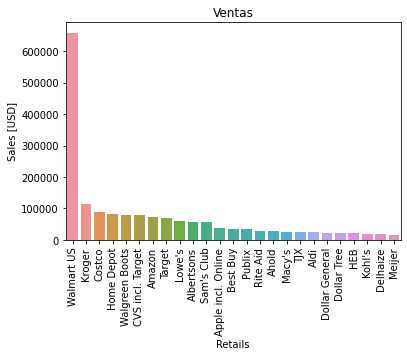

In [5]:
fig = sns.barplot(data = df_sorted, x = 'Company', y = 'Sales')
fig.set_title('Ventas')
fig.set_xlabel('Retails')
fig.set_ylabel('Sales [USD]')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
sns.set(rc = {'figure.figsize':(20,8)})

In [8]:
mean_sales_without_walmart = df_sorted['Sales'][1:].mean().round(2)
mean_sales_without_walmart


46602.42

El promedio de ventas de la compañías sin contar Walmart US es **46,602.42USD**

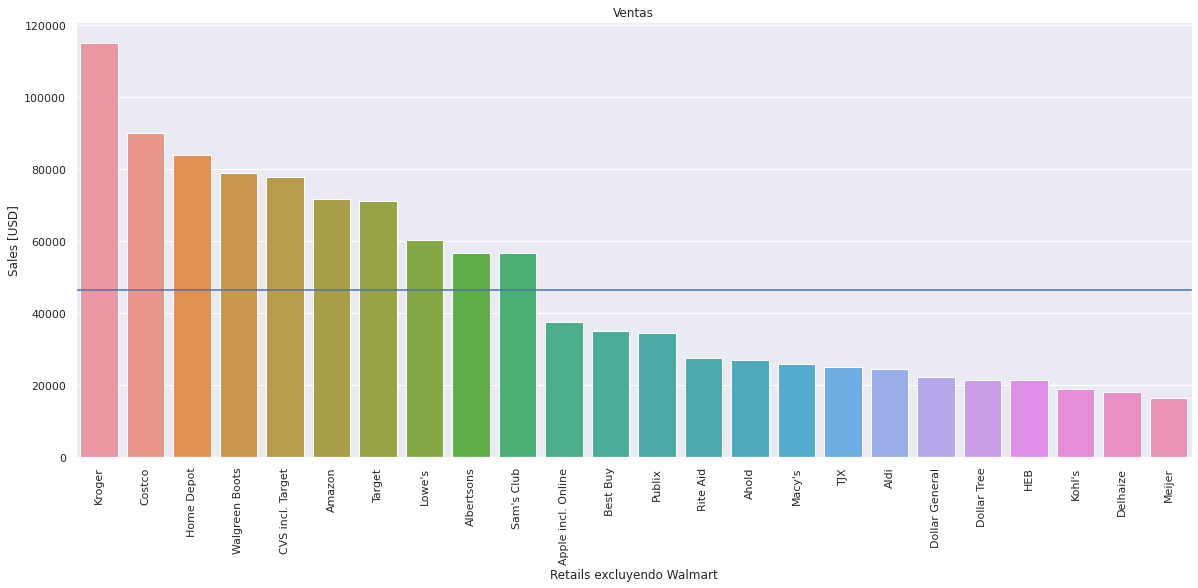

In [9]:
fig = sns.barplot(data = df_sorted[1:], x = 'Company', y = 'Sales')
fig.axhline(mean_sales_without_walmart)
fig.set_title('Ventas')
fig.set_xlabel('Retails excluyendo Walmart')
fig.set_ylabel('Sales [USD]')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
sns.set(rc = {'figure.figsize':(20,8)})

Hay 10 compañías sobre el promedio:
 - Kroger, Costco, Home Depot, Walgreen Boots, CSV incl. Target, Amazon, Target, Lowe's, Albertsons y Sam's Club.

Hay 14 compañías por debajo del promedio:
 - Apple incl. Online, Best Buy, Rublix, Rite Aid, Ahold, Macy's, TJX, Aldi, Dollar General, Dollar Tree, HEB, Kohl's, Delhaize y Meijer. 

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

Para responder esta pregunta, aplicaremos un histograma con las compañías, pero nos surge una duda ¿Cómo determinamos la cantidad de bins?, para ello utilizaremos la regla de Sturges

$$k = [1 + log_{2}(n)]$$

In [16]:
import math
n = df_sorted.shape[0]
k = math.floor(1 + math.log2(n))
k

5

In [30]:
sales_max = df_sorted['Sales'].max()
sales_min = df_sorted['Sales'].min()
print(sales_max, sales_min)

658119 16592


In [32]:
step = (sales_max - sales_min) / k
step

128305.4

La cantidad de bins es k=5, lo cual, cada bin es aproximadamente de 128.300 USD.

Text(0, 0.5, 'Frecuencia')

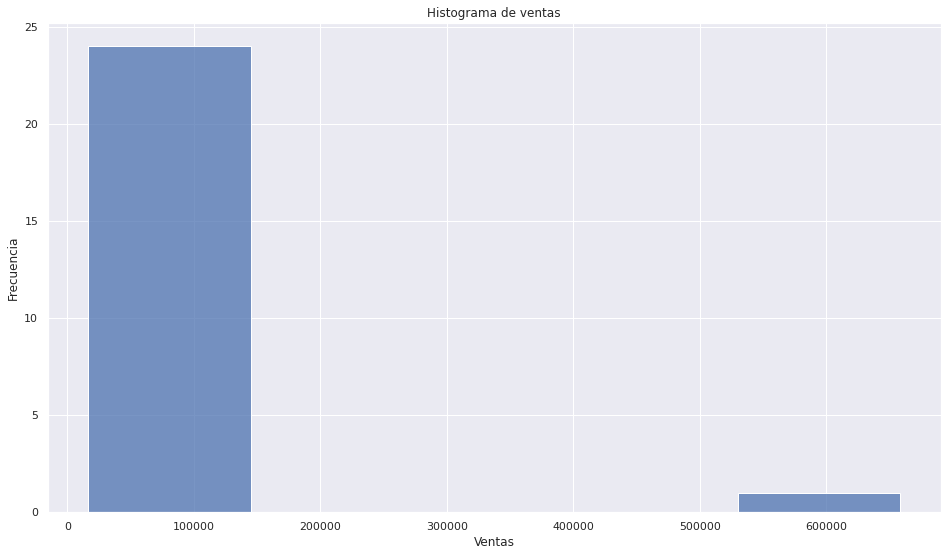

In [20]:
plt.figure(figsize = (16,9)); 
sns.histplot(data = df_sorted,x = 'Sales' ,bins = 5)
plt.title("Histograma de ventas")
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')

Con esta separación, queda claro nuevamente que Walmart es la compañía dominante donde 24 de las 25 compañías, quedan en el primer segmento de 16.600 - 144.900 USD.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

Ordenaremos el Dataset por la cantidad de tiendas y las visualizamos en gráfico de barras.

In [18]:
df_stores_sorted = df.sort_values('Stores', ascending=0)

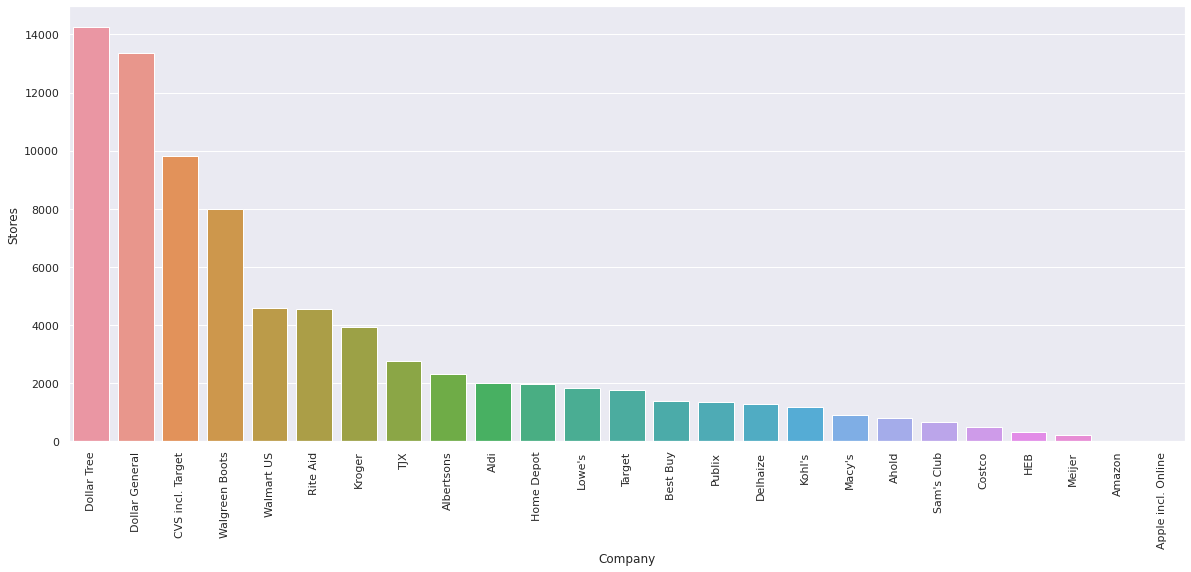

In [22]:
sns.barplot (data = df_stores_sorted, x= 'Company', y= 'Stores')
plt.xticks(rotation=90)
plt.show()

In [35]:
stores_max = df_stores_sorted['Stores'].max()
stores_min = df_stores_sorted['Stores'].min()
print(stores_max, stores_min)

14250.0 231.0


In [36]:
step = (stores_max - stores_min) / k
step

2803.8

Text(0, 0.5, 'Frecuencia')

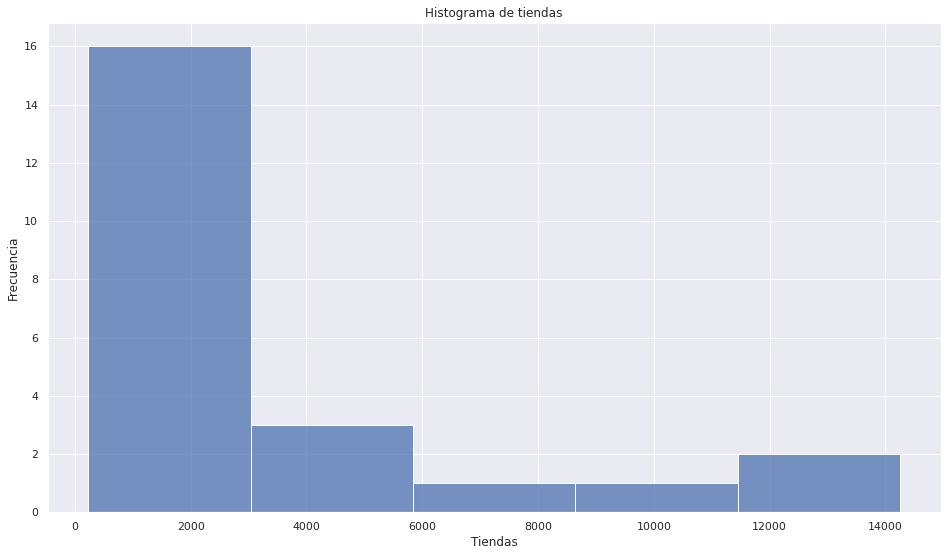

In [24]:
plt.figure(figsize = (16,9)); 
sns.histplot(data = df_stores_sorted, x = 'Stores', bins = 5)
plt.title("Histograma de tiendas")
plt.xlabel('Tiendas')
plt.ylabel('Frecuencia')

En el primer rango entre 231-3035 tiendas están las mayorías de las compañías, en total 16. 

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

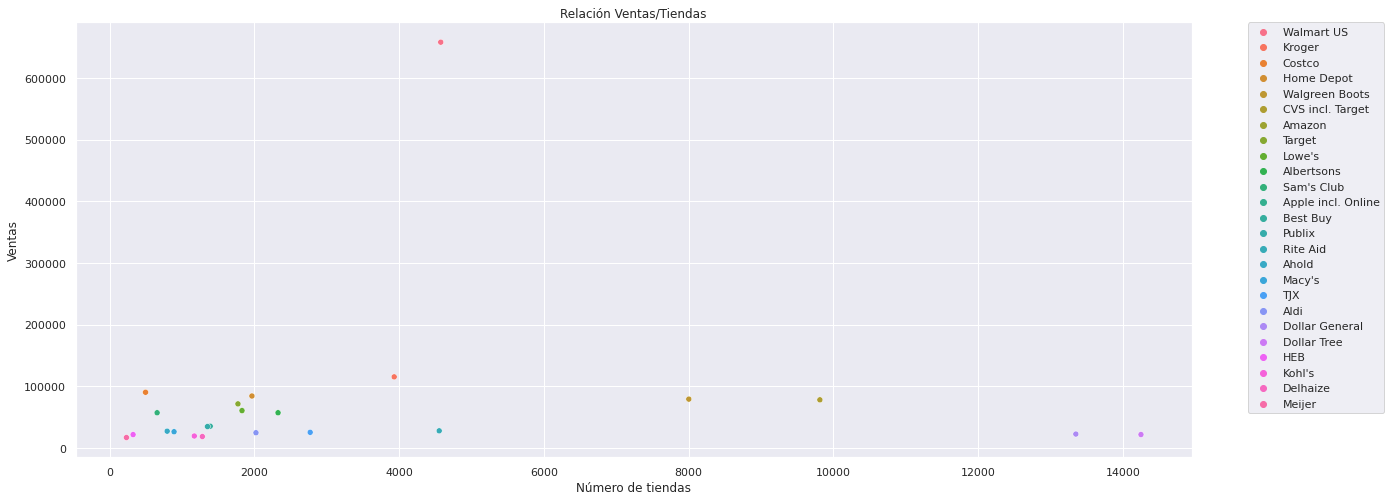

In [45]:
sns.scatterplot(data=df_sorted,x='Stores',y='Sales',hue='Company')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Número de tiendas')
plt.ylabel('Ventas')
plt.title('Relación Ventas/Tiendas')
plt.show()

### 5. ¿Cuál es el rango que existe entre las ventas?

In [44]:
rango = df['Sales'].max()- df['Sales'].min()
rango

641527

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1a203d8-61a0-469e-b175-164429fc9b5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>